<a href="https://colab.research.google.com/github/lakshmant-thota/ml_zoomcamp/blob/master/homework2_lakshman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-08 14:53:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.1s    

2024-10-08 14:53:06 (2.14 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [8]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
df.Brand.unique()


array(['Asus', 'Alurin', 'MSI', 'HP', 'Lenovo', 'Medion', 'Acer', 'Apple',
       'Razer', 'Gigabyte', 'Dell', 'LG', 'Samsung', 'PcCom', 'Microsoft',
       'Primux', 'Prixton', 'Dynabook Toshiba', 'Thomson', 'Denver',
       'Deep Gaming', 'Vant', 'Innjoo', 'Jetwing', 'Millenium', 'Realme',
       'Toshiba'], dtype=object)

In [13]:
df.dtypes

,0
laptop,object
status,object
brand,object
model,object
cpu,object
ram,int64
storage,int64
storage_type,object
gpu,object
screen,float64


In [14]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings


['laptop', 'status', 'brand', 'model', 'cpu', 'storage_type', 'gpu', 'touch']

In [15]:
for col in strings:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [16]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


<Axes: xlabel='final_price', ylabel='Count'>

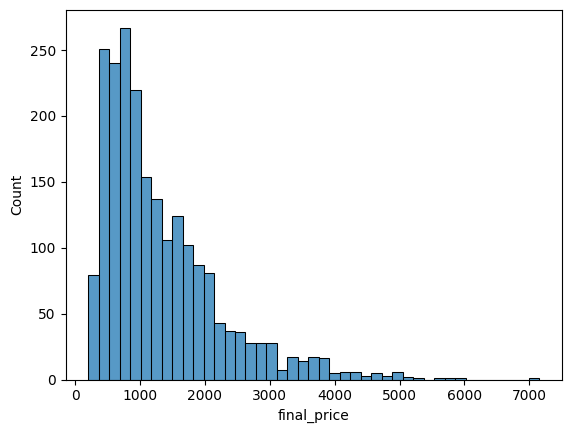

In [24]:
sns.histplot(df.final_price)

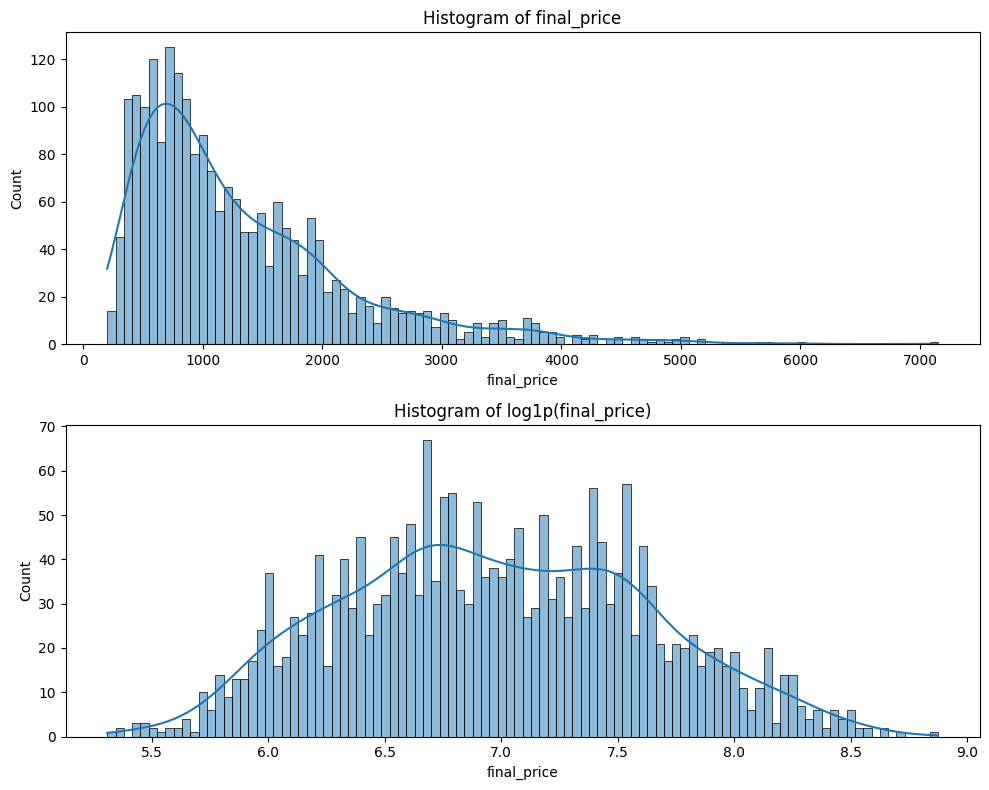

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(df.final_price, bins=100, kde=True, ax=axs[0])
axs[0].set_title('Histogram of final_price')

sns.histplot(np.log1p(df.final_price), bins=100, kde=True, ax=axs[1])
axs[1].set_title('Histogram of log1p(final_price)')

plt.tight_layout()
plt.show()

In [21]:
df.isnull().sum()

,0
laptop,0
status,0
brand,0
model,0
cpu,0
ram,0
storage,0
storage_type,42
gpu,1371
screen,4


# a1 : screen has 4 null values out of the  4 columns mentioned

In [78]:
df.screen.unique()

array([15.6 , 17.3 , 14.  , 16.1 , 13.3 , 16.  , 13.6 , 17.  , 15.3 ,
       14.5 , 13.4 , 14.2 , 18.  , 14.1 , 12.4 , 13.5 , 16.2 , 15.  ,
       11.6 , 13.  , 10.5 , 14.4 ,   nan, 12.3 , 15.4 , 12.5 , 10.1 ,
       10.95, 12.  , 13.9 ])

**Question** 2
What's the median (50% percentile) for variable 'ram'?

8
16
24
32

In [23]:
df.ram.median()

16.0

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [90]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [91]:
n,n_train, n_val, n_test

(2160, 1296, 432, 432)

In [30]:
idx = np.arange(n)

In [32]:
idx

array([   0,    1,    2, ..., 2157, 2158, 2159])

In [33]:
np.random.seed(42)
np.random.shuffle(idx)

In [36]:
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [37]:
idx[1]

668

In [92]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [93]:
len(df_train), len(df_val), len(df_test)


(1296, 432, 432)

In [43]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [44]:
df_train.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

In [47]:
base = ['ram', 'storage', 'screen']



---

filling nulls in screen with 0


In [58]:
x_train = df_train[base].fillna(0).values
y_train = np.log1p(df_train['final_price'])
x_val = df_val[base].fillna(0).values
y_val = np.log1p(df_val['final_price'])
x_test = df_test[base].fillna(0).values
y_test = np.log1p(df_test['final_price'])

In [53]:
x_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [54]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [59]:
w0, w = train_linear_regression(x_train, y_train)


In [61]:
w0

6.7271637061124565

In [63]:
w

array([ 0.02630589,  0.00066041, -0.03651909])

In [66]:
y_pred = w0 + x_train.dot(w)

In [67]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [68]:
rmse(y_train, y_pred)

0.44632651855038796

# model validation

In [87]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [94]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse_0 = rmse(y_val, y_pred)
rmse_0


0.4288635315474416



---
filling with mean


In [81]:
df_train.screen.value_counts()

,count
screen,
15.60,602
14.00,233
16.00,105
17.30,94
13.30,67
17.00,28
16.10,25
13.00,19
15.00,12


In [96]:
mean_filed = df_train.screen.mean()
mean_filed

15.163534416086618

In [97]:
def prepare_X(df):
    df_num = df[base]
    df_num['screen'] = df_num['screen'].fillna(mean_filed)
    X = df_num.values
    return X

In [98]:
X_train_mean = prepare_X(df_train)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X(df_val)
y_pred = w0 + X_val_mean.dot(w)
rmse(y_val, y_pred)

<ipython-input-97-c0c2951d3caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['screen'] = df_num['screen'].fillna(mean_filed)
<ipython-input-97-c0c2951d3caf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['screen'] = df_num['screen'].fillna(mean_filed)


0.4311767801693919